# Prediction of immunotherapy response

# Table of contents

0. [Reading dataset](#0-reading-dataset)
1. [Classic classifier](#1-classic-classifier)
2. [GCN classifier](#2-gnn-classifier)
    1. [Split per tumour type](#1-split-per-tumour-type)
    2. [Split per KMeans clusters](#2-split-per-kmeans-clusters)
    3. [Split per Spectral clustering clusters](#3-split-per-spectral-clustering-clusters)
    4. [Split per Hierachical clustering clusters](#3-split-per-hierarhical-clustering-clusters)
3. [Compare models](#3-compare-models)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from evaluation.ClassificationMetrics import ClassificationMetrics

from manage.BinaryClassifierTrainTestManager import BinaryClassifierTrainTestManager
from manage.GCNClassifierTrainTestManager import GCNClassifierTrainTestManager

from models.BinaryClassifier import BinaryClassifier
from models.GCNClassifier import GCNClassifier

from utils.preProcessing import preProcessing

from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.linear_model import LogisticRegression
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances, manhattan_distances

## 0. Reading dataset and preprocessing

In [2]:
## No mutational signatures
df_no_sigmut = pd.read_excel('data/Supplemental-table1.xlsx')
df_no_sigmut = df_no_sigmut.loc[df_no_sigmut["Cohort"] == "Naive"]

## Mutational signatures
df_sigmut = pd.read_excel('data/table-s1-sigmut.xlsx')
df_sigmut = df_sigmut.loc[df_sigmut["Cohort"] == "Naive"]

In [3]:
## No mutational signatures
# Drop NaN values
df_no_sigmut = preProcessing.delete_nan_values(df_no_sigmut)
# Select and normalize features
features_name_no_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression"]
X_no_sigmut = df_no_sigmut.loc[:,features_name_no_sigmut].to_numpy()
# Normalize data
X_no_sigmut = preProcessing.normalize_data(X_no_sigmut)
# Numerize label
label_name = "Clinical benefit"
y_no_sigmut = np.where(df_no_sigmut[label_name]=="DCB",1,0)

## Mutational signatures
# Drop NaN values
df_sigmut = preProcessing.delete_nan_values(df_sigmut)
# Select and normalize features
features_name_sigmut = ["Age at advanced disease diagnosis","CD8+ T cell score","Genome mut per mb","Exome mut per mb","CD274 expression","M1M2 expression","SBS2","SBS4","SBS18","SBS5","SBS6","SBS7a","SBS7b","SBS7c","SBS13","SBS26","SBS44"]
X_sigmut = df_sigmut.loc[:,features_name_sigmut].to_numpy()
# Normalize data
X_sigmut = preProcessing.normalize_data(X_sigmut)
# Numerize label
y_sigmut = np.where(df_sigmut[label_name]=="DCB",1,0)

## 1. Classic classifier
We use a logistic regression classifier.

In [4]:
# Instanciate classifier
classic_clf_no_sigmut = BinaryClassifier(LogisticRegression())
classic_clf_sigmut = BinaryClassifier(LogisticRegression())

# Instanciate the train-test manager
classic_manager_no_sigmut = BinaryClassifierTrainTestManager(classic_clf_no_sigmut)
classic_manager_sigmut = BinaryClassifierTrainTestManager(classic_clf_sigmut)

### Make the leave one out cross validation

In [5]:
## No sigmut
test_classes_classic_no_sigmut, test_scores_classic_no_sigmut = classic_manager_no_sigmut.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut)

## Sigmut
test_classes_classic_sigmut, test_scores_classic_sigmut = classic_manager_sigmut.leave_one_out_cross_validation(X_sigmut, y_sigmut)

## 2. GCN classifier

In [6]:
distance_measure_euclidean, distance_measure_cosine, distance_measure_manhattan, distance_error = "euclidean","cosine","manhattan","mahalanobis"
max_neighbors = 3

### 1. Split per tumour type

In [7]:
# Group labels for connecting patients (tumour type)
group_no_sigmut_tumour_type = df_no_sigmut["Tumour type"].to_numpy()
group_sigmut_tumour_type = df_sigmut["Tumour type.1"].to_numpy()

##### Euclidean distance

In [8]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_tumour_type_euclidean = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_tumour_type_euclidean = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_tumour_type_euclidean = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_tumour_type_euclidean)
gcn_manager_sigmut_tumour_type_euclidean = GCNClassifierTrainTestManager(gcn_clf_sigmut_tumour_type_euclidean)

In [9]:
## No sigmut
test_scores_gcn_no_sigmut_tumour_type_euclidean, test_classes_gcn_no_sigmut_tumour_type_euclidean = gcn_manager_no_sigmut_tumour_type_euclidean.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_tumour_type, 50, distance_measure_euclidean, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_tumour_type_euclidean, test_classes_gcn_sigmut_tumour_type_euclidean = gcn_manager_sigmut_tumour_type_euclidean.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_tumour_type, 50, distance_measure_euclidean, max_neighbors)

##### Cosine distance

In [10]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_tumour_type_cosine = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_tumour_type_cosine = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_tumour_type_cosine = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_tumour_type_cosine)
gcn_manager_sigmut_tumour_type_cosine = GCNClassifierTrainTestManager(gcn_clf_sigmut_tumour_type_cosine)

In [11]:
## No sigmut
test_scores_gcn_no_sigmut_tumour_type_cosine, test_classes_gcn_no_sigmut_tumour_type_cosine = gcn_manager_no_sigmut_tumour_type_cosine.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_tumour_type, 50, distance_measure_cosine, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_tumour_type_cosine, test_classes_gcn_sigmut_tumour_type_cosine = gcn_manager_sigmut_tumour_type_cosine.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_tumour_type, 50, distance_measure_cosine, max_neighbors)

##### Manhattan distance

In [12]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_tumour_type_manhattan = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_tumour_type_manhattan = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_tumour_type_manhattan = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_tumour_type_manhattan)
gcn_manager_sigmut_tumour_type_manhattan = GCNClassifierTrainTestManager(gcn_clf_sigmut_tumour_type_manhattan)

In [13]:
## No sigmut
test_scores_gcn_no_sigmut_tumour_type_manhattan, test_classes_gcn_no_sigmut_tumour_type_manhattan = gcn_manager_no_sigmut_tumour_type_manhattan.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_tumour_type, 50, distance_measure_manhattan, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_tumour_type_manhattan, test_classes_gcn_sigmut_tumour_type_manhattan = gcn_manager_sigmut_tumour_type_manhattan.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_tumour_type, 50, distance_measure_manhattan, max_neighbors)

### 2. Split per KMeans clusters

##### Euclidean distance

In [14]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_kmeans_euclidean = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_kmeans_euclidean = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_kmeans_euclidean = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_kmeans_euclidean)
gcn_manager_sigmut_kmeans_euclidean = GCNClassifierTrainTestManager(gcn_clf_sigmut_kmeans_euclidean)

In [15]:
# Distance matrix no sigmut
distance_matrix_euclidean_no_sigmut = euclidean_distances(X_no_sigmut)

# Distance matrix sigmut
distance_matrix_euclidean_sigmut = euclidean_distances(X_sigmut)

# Group labels for connecting patients (kmeans clusters)
group_no_sigmut_kmeans_euclidean = KMeans(n_clusters=10).fit(distance_matrix_euclidean_no_sigmut).labels_
group_sigmut_kmeans_euclidean = KMeans(n_clusters=10).fit(distance_matrix_euclidean_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_kmeans_euclidean, test_classes_gcn_no_sigmut_kmeans_euclidean = gcn_manager_no_sigmut_kmeans_euclidean.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_kmeans_euclidean, 50, distance_measure_euclidean, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_kmeans_euclidean, test_classes_gcn_sigmut_kmeans_euclidean = gcn_manager_sigmut_kmeans_euclidean.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_kmeans_euclidean, 50, distance_measure_euclidean, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### Cosine distance

In [16]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_kmeans_cosine = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_kmeans_cosine = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_kmeans_cosine = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_kmeans_cosine)
gcn_manager_sigmut_kmeans_cosine = GCNClassifierTrainTestManager(gcn_clf_sigmut_kmeans_cosine)

In [17]:
# Distance matrix no sigmut
distance_matrix_cosine_no_sigmut = cosine_distances(X_no_sigmut)

# Distance matrix sigmut
distance_matrix_cosine_sigmut = cosine_distances(X_sigmut)

# Group labels for connecting patients (kmeans clusters)
group_no_sigmut_kmeans_cosine = KMeans(n_clusters=10).fit(distance_matrix_cosine_no_sigmut).labels_
group_sigmut_kmeans_cosine = KMeans(n_clusters=10).fit(distance_matrix_cosine_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_kmeans_cosine, test_classes_gcn_no_sigmut_kmeans_cosine = gcn_manager_no_sigmut_kmeans_cosine.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_kmeans_cosine, 50, distance_measure_cosine, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_kmeans_cosine, test_classes_gcn_sigmut_kmeans_cosine = gcn_manager_sigmut_kmeans_cosine.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_kmeans_cosine, 50, distance_measure_cosine, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


##### Manhattan distance

In [18]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_kmeans_manhattan = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_kmeans_manhattan = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_kmeans_manhattan = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_kmeans_manhattan)
gcn_manager_sigmut_kmeans_manhattan = GCNClassifierTrainTestManager(gcn_clf_sigmut_kmeans_manhattan)

In [19]:
# Distance matrix no sigmut
distance_matrix_manhattan_no_sigmut = manhattan_distances(X_no_sigmut)

# Distance matrix sigmut
distance_matrix_manhattan_sigmut = manhattan_distances(X_sigmut)

# Group labels for connecting patients (kmeans clusters)
group_no_sigmut_kmeans_manhattan = KMeans(n_clusters=10).fit(distance_matrix_manhattan_no_sigmut).labels_
group_sigmut_kmeans_manhattan = KMeans(n_clusters=10).fit(distance_matrix_manhattan_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_kmeans_manhattan, test_classes_gcn_no_sigmut_kmeans_manhattan = gcn_manager_no_sigmut_kmeans_manhattan.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_kmeans_manhattan, 50, distance_measure_manhattan, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_kmeans_manhattan, test_classes_gcn_sigmut_kmeans_manhattan = gcn_manager_sigmut_kmeans_manhattan.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_kmeans_manhattan, 50, distance_measure_manhattan, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### 3. Split per Spectral clustering clusters

##### Euclidean distance

In [20]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_spectral_euclidean = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_spectral_euclidean = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_spectral_euclidean = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_spectral_euclidean)
gcn_manager_sigmut_spectral_euclidean = GCNClassifierTrainTestManager(gcn_clf_sigmut_spectral_euclidean)

In [21]:
# Group labels for connecting patients (spectral clustering clusters)
group_no_sigmut_spectral_euclidean = SpectralClustering(n_clusters=10).fit(distance_matrix_euclidean_no_sigmut).labels_
group_sigmut_spectral_euclidean = SpectralClustering(n_clusters=10).fit(distance_matrix_euclidean_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_spectral_euclidean, test_classes_gcn_no_sigmut_spectral_euclidean = gcn_manager_no_sigmut_spectral_euclidean.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_spectral_euclidean, 50, distance_measure_euclidean, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_spectral_euclidean, test_classes_gcn_sigmut_spectral_euclidean = gcn_manager_sigmut_spectral_euclidean.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_spectral_euclidean, 50, distance_measure_euclidean, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:420: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  est = KMeans(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10

##### Cosine distance

In [22]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_spectral_cosine = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_spectral_cosine = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_spectral_cosine = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_spectral_cosine)
gcn_manager_sigmut_spectral_cosine = GCNClassifierTrainTestManager(gcn_clf_sigmut_spectral_cosine)

In [23]:
# Group labels for connecting patients (spectral clustering clusters)
group_no_sigmut_spectral_cosine = SpectralClustering(n_clusters=10).fit(distance_matrix_cosine_no_sigmut).labels_
group_sigmut_spectral_cosine = SpectralClustering(n_clusters=10).fit(distance_matrix_cosine_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_spectral_cosine, test_classes_gcn_no_sigmut_spectral_cosine = gcn_manager_no_sigmut_spectral_cosine.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_spectral_cosine, 50, distance_measure_cosine, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_spectral_cosine, test_classes_gcn_sigmut_spectral_cosine = gcn_manager_sigmut_spectral_cosine.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_spectral_cosine, 50, distance_measure_cosine, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(


##### Manhattan distance

In [24]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_spectral_manhattan = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_spectral_manhattan = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_spectral_manhattan = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_spectral_manhattan)
gcn_manager_sigmut_spectral_manhattan = GCNClassifierTrainTestManager(gcn_clf_sigmut_spectral_manhattan)

In [25]:
# Group labels for connecting patients (spectral clustering clusters)
group_no_sigmut_spectral_manhattan = SpectralClustering(n_clusters=10).fit(distance_matrix_manhattan_no_sigmut).labels_
group_sigmut_spectral_manhattan = SpectralClustering(n_clusters=10).fit(distance_matrix_manhattan_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_spectral_manhattan, test_classes_gcn_no_sigmut_spectral_manhattan = gcn_manager_no_sigmut_spectral_manhattan.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_spectral_manhattan, 50, distance_measure_manhattan, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_spectral_manhattan, test_classes_gcn_sigmut_spectral_manhattan = gcn_manager_sigmut_spectral_manhattan.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_spectral_manhattan, 50, distance_measure_manhattan, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/cluster/_spectral.py:717: UserWarning: The spectral clustering API has changed. ``fit``now constructs an affinity matrix from data. To use a custom affinity matrix, set ``affinity=precomputed``.
  warnings.warn(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/numpy/core/_methods.py:239: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/arthur/Documents/TN/3A/St

### 4. Split per Hierarchical clustering clusters

##### Euclidean distance

In [26]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_hierarchical_euclidean = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_hierarchical_euclidean = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_hierarchical_euclidean = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_hierarchical_euclidean)
gcn_manager_sigmut_hierarchical_euclidean = GCNClassifierTrainTestManager(gcn_clf_sigmut_hierarchical_euclidean)

In [27]:
# Group labels for connecting patients (hierarchical clustering clusters)
group_no_sigmut_hierarchical_euclidean = AgglomerativeClustering(n_clusters=10).fit(distance_matrix_euclidean_no_sigmut).labels_
group_sigmut_hierarchical_euclidean = AgglomerativeClustering(n_clusters=10).fit(distance_matrix_euclidean_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_hierarchical_euclidean, test_classes_gcn_no_sigmut_hierarchical_euclidean = gcn_manager_no_sigmut_hierarchical_euclidean.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_hierarchical_euclidean, 50, distance_measure_euclidean, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_hierarchical_euclidean, test_classes_gcn_sigmut_hierarchical_euclidean = gcn_manager_sigmut_hierarchical_euclidean.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_hierarchical_euclidean, 50, distance_measure_euclidean, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


##### Cosine distance

In [28]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_hierarchical_cosine = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_hierarchical_cosine = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_hierarchical_cosine= GCNClassifierTrainTestManager(gcn_clf_no_sigmut_hierarchical_cosine)
gcn_manager_sigmut_hierarchical_cosine = GCNClassifierTrainTestManager(gcn_clf_sigmut_hierarchical_cosine)

In [29]:
# Group labels for connecting patients (hierarchical clustering clusters)
group_no_sigmut_hierarchical_cosine = AgglomerativeClustering(n_clusters=10).fit(distance_matrix_cosine_no_sigmut).labels_
group_sigmut_hierarchical_cosine = AgglomerativeClustering(n_clusters=10).fit(distance_matrix_cosine_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_hierarchical_cosine, test_classes_gcn_no_sigmut_hierarchical_cosine = gcn_manager_no_sigmut_hierarchical_cosine.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_hierarchical_cosine, 50, distance_measure_cosine, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_hierarchical_cosine, test_classes_gcn_sigmut_hierarchical_cosine = gcn_manager_sigmut_hierarchical_cosine.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_hierarchical_cosine, 50, distance_measure_cosine, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


##### Manhattan distance

In [30]:
# Instanciate GCN classifier
gcn_clf_no_sigmut_hierarchical_manhattan = GCNClassifier(len(features_name_no_sigmut))
gcn_clf_sigmut_hierarchical_manhattan = GCNClassifier(len(features_name_sigmut))

# Instanciate the GCN train-test manager
gcn_manager_no_sigmut_hierarchical_manhattan = GCNClassifierTrainTestManager(gcn_clf_no_sigmut_hierarchical_manhattan)
gcn_manager_sigmut_hierarchical_manhattan = GCNClassifierTrainTestManager(gcn_clf_sigmut_hierarchical_manhattan)

In [31]:
# Group labels for connecting patients (hierarchical clustering clusters)
group_no_sigmut_hierarchical_manhattan = AgglomerativeClustering(n_clusters=10).fit(distance_matrix_manhattan_no_sigmut).labels_
group_sigmut_hierarchical_manhattan = AgglomerativeClustering(n_clusters=10).fit(distance_matrix_manhattan_sigmut).labels_

## No sigmut
test_scores_gcn_no_sigmut_hierarchical_manhattan, test_classes_gcn_no_sigmut_hierarchical_manhattan = gcn_manager_no_sigmut_hierarchical_manhattan.leave_one_out_cross_validation(X_no_sigmut, y_no_sigmut, group_no_sigmut_hierarchical_manhattan, 50, distance_measure_manhattan, max_neighbors)

## Sigmut
test_scores_gcn_sigmut_hierarchical_manhattan, test_classes_gcn_sigmut_hierarchical_manhattan = gcn_manager_sigmut_hierarchical_manhattan.leave_one_out_cross_validation(X_sigmut, y_sigmut, group_sigmut_hierarchical_manhattan, 50, distance_measure_manhattan, max_neighbors)

/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/home/arthur/Documents/TN/3A/Stage/MEDomics/mutational-signatures/venv/lib/python3.10/site-packages/scipy/cluster/hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


## 3. Compare models

### Classic classifier

In [32]:
## Classic classifier - no sigmut
acc_classic_no_sigmut, pre_classic_no_sigmut, rec_classic_no_sigmut, f1_classic_no_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_classic_no_sigmut)
fpr_classic_no_sigmut, tpr_classic_no_sigmut, thresholds_classic_no_sigmut = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_classic_no_sigmut)
auc_classic_no_sigmut = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_classic_no_sigmut)

## Classic classifier - sigmut
acc_classic_sigmut, pre_classic_sigmut, rec_classic_sigmut, f1_classic_sigmut = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_classic_sigmut)
fpr_classic_sigmut, tpr_classic_sigmut, thresholds_classic_sigmut = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_classic_sigmut)
auc_classic_sigmut = ClassificationMetrics.compute_auc(y_sigmut, test_scores_classic_sigmut)

Text(0.5, 1.0, 'Classification metrics for classic classifier (sigmut)')

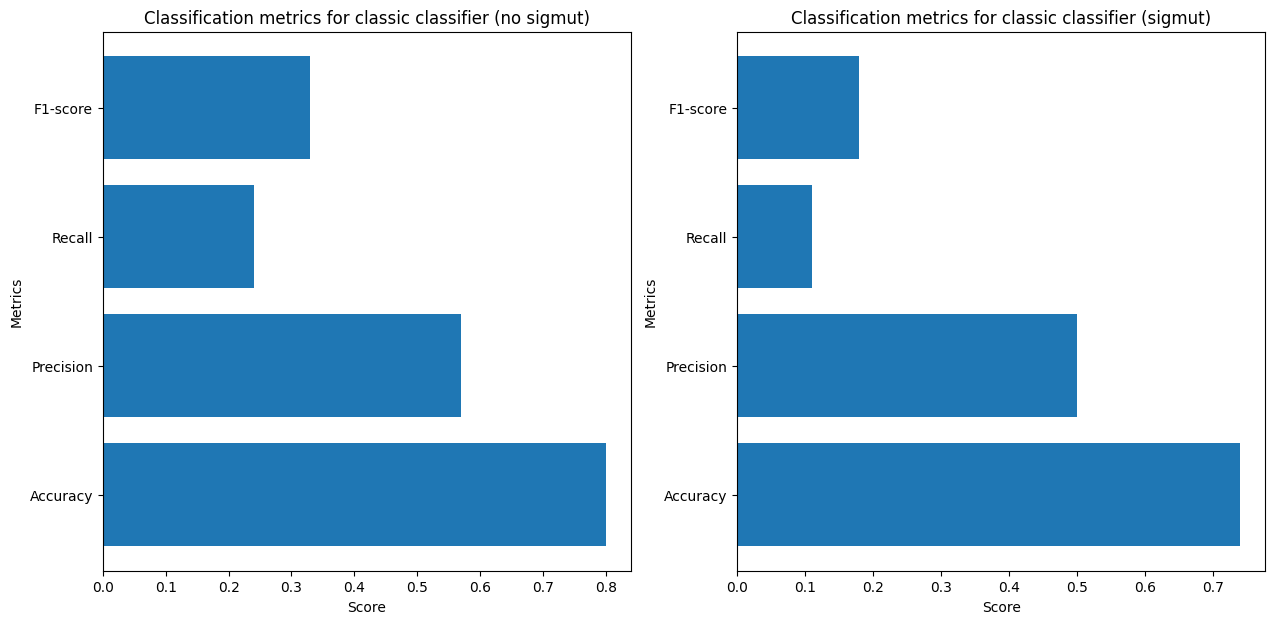

In [33]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

ax[0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_classic_no_sigmut, pre_classic_no_sigmut, rec_classic_no_sigmut, f1_classic_no_sigmut])
ax[0].set_xlabel("Score")
ax[0].set_ylabel("Metrics")
ax[0].set_title("Classification metrics for classic classifier (no sigmut)")

ax[1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_classic_sigmut, pre_classic_sigmut, rec_classic_sigmut, f1_classic_sigmut])
ax[1].set_xlabel("Score")
ax[1].set_ylabel("Metrics")
ax[1].set_title("Classification metrics for classic classifier (sigmut)")

Text(0, 0.7, 'AUC sigmut : 0.43')

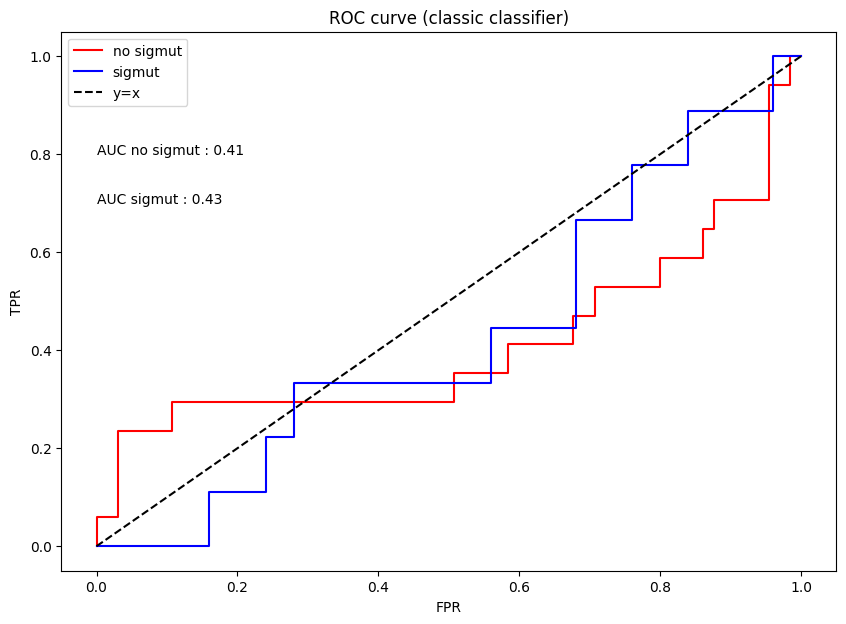

In [34]:
fig, ax = plt.subplots(figsize=(10,7))
x = np.linspace(0,1,100)

# Classic classifier :
ax.plot(fpr_classic_no_sigmut, tpr_classic_no_sigmut, color='red',label='no sigmut')
ax.plot(fpr_classic_sigmut, tpr_classic_sigmut, color='blue',label='sigmut')
ax.plot(x,x,linestyle='--',color='black',label='y=x')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.set_title('ROC curve (classic classifier)')
ax.legend()
ax.text(0,0.8,f"AUC no sigmut : {auc_classic_no_sigmut}")
ax.text(0,0.7,f"AUC sigmut : {auc_classic_sigmut}")

### GCN classifier - tumour type

In [35]:
## No sigmut - euclidean distance
acc_gcn_no_sigmut_tumour_type_euclidean, pre_gcn_no_sigmut_tumour_type_euclidean, rec_gcn_no_sigmut_tumour_type_euclidean, f1_gcn_no_sigmut_tumour_type_euclidean = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_tumour_type_euclidean)
fpr_gcn_no_sigmut_tumour_type_euclidean, tpr_gcn_no_sigmut_tumour_type_euclidean, thresholds_gcn_no_sigmut_tumour_type_euclidean = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_tumour_type_euclidean)
auc_gcn_no_sigmut_tumour_type_euclidean = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_tumour_type_euclidean)

## Sigmut - euclidean distance
acc_gcn_sigmut_tumour_type_euclidean, pre_gcn_sigmut_tumour_type_euclidean, rec_gcn_sigmut_tumour_type_euclidean, f1_gcn_sigmut_tumour_type_euclidean = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_tumour_type_euclidean)
fpr_gcn_sigmut_tumour_type_euclidean, tpr_gcn_sigmut_tumour_type_euclidean, thresholds_gcn_sigmut_tumour_type_euclidean = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_tumour_type_euclidean)
auc_gcn_sigmut_tumour_type_euclidean = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_tumour_type_euclidean)

## No sigmut - cosine distance
acc_gcn_no_sigmut_tumour_type_cosine, pre_gcn_no_sigmut_tumour_type_cosine, rec_gcn_no_sigmut_tumour_type_cosine, f1_gcn_no_sigmut_tumour_type_cosine = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_tumour_type_cosine)
fpr_gcn_no_sigmut_tumour_type_cosine, tpr_gcn_no_sigmut_tumour_type_cosine, thresholds_gcn_no_sigmut_tumour_type_cosine = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_tumour_type_cosine)
auc_gcn_no_sigmut_tumour_type_cosine = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_tumour_type_cosine)

## Sigmut - cosine distance
acc_gcn_sigmut_tumour_type_cosine, pre_gcn_sigmut_tumour_type_cosine, rec_gcn_sigmut_tumour_type_cosine, f1_gcn_sigmut_tumour_type_cosine = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_tumour_type_cosine)
fpr_gcn_sigmut_tumour_type_cosine, tpr_gcn_sigmut_tumour_type_cosine, thresholds_gcn_sigmut_tumour_type_cosine = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_tumour_type_cosine)
auc_gcn_sigmut_tumour_type_cosine = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_tumour_type_cosine)

## No sigmut - manhattan distance
acc_gcn_no_sigmut_tumour_type_manhattan, pre_gcn_no_sigmut_tumour_type_manhattan, rec_gcn_no_sigmut_tumour_type_manhattan, f1_gcn_no_sigmut_tumour_type_manhattan = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_tumour_type_manhattan)
fpr_gcn_no_sigmut_tumour_type_manhattan, tpr_gcn_no_sigmut_tumour_type_manhattan, thresholds_gcn_no_sigmut_tumour_type_manhattan = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_tumour_type_manhattan)
auc_gcn_no_sigmut_tumour_type_manhattan = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_tumour_type_manhattan)

## Sigmut - manhattan distance
acc_gcn_sigmut_tumour_type_manhattan, pre_gcn_sigmut_tumour_type_manhattan, rec_gcn_sigmut_tumour_type_manhattan, f1_gcn_sigmut_tumour_type_manhattan = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_tumour_type_manhattan)
fpr_gcn_sigmut_tumour_type_manhattan, tpr_gcn_sigmut_tumour_type_manhattan, thresholds_gcn_sigmut_tumour_type_manhattan = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_tumour_type_manhattan)
auc_gcn_sigmut_tumour_type_manhattan = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_tumour_type_manhattan)

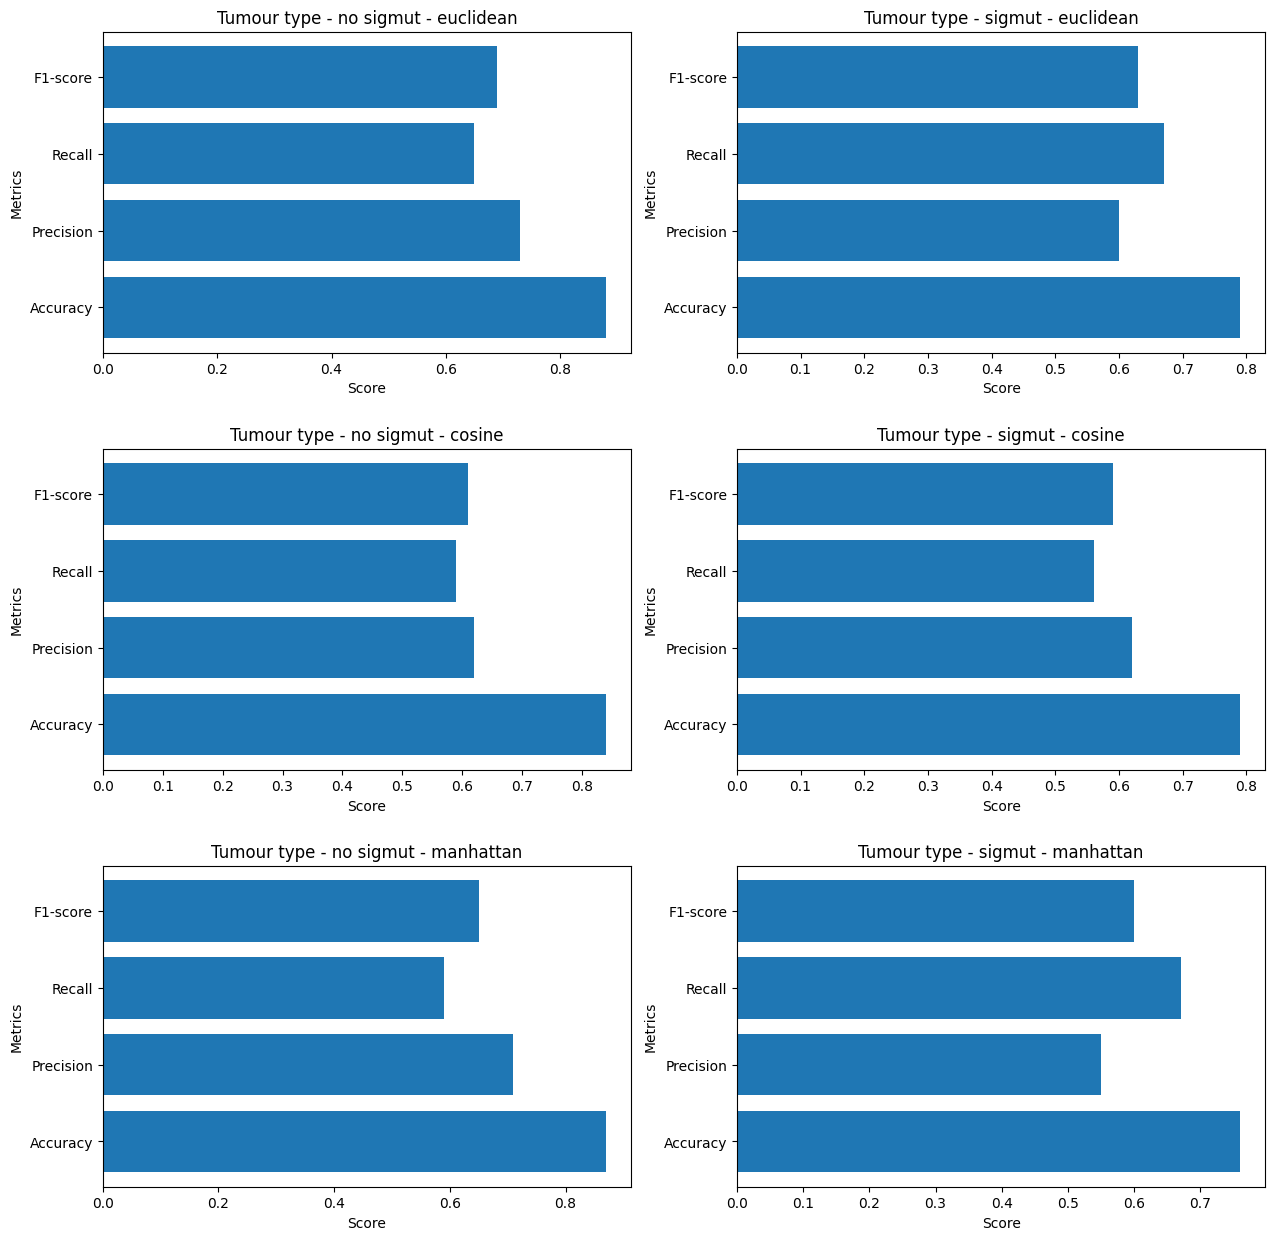

In [36]:
fig, ax = plt.subplots(3,2,figsize=(15,15))

ax[0,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_tumour_type_euclidean, pre_gcn_no_sigmut_tumour_type_euclidean, rec_gcn_no_sigmut_tumour_type_euclidean, f1_gcn_no_sigmut_tumour_type_euclidean])
ax[0,0].set_xlabel("Score")
ax[0,0].set_ylabel("Metrics")
ax[0,0].set_title("Tumour type - no sigmut - euclidean")

ax[0,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_tumour_type_euclidean, pre_gcn_sigmut_tumour_type_euclidean, rec_gcn_sigmut_tumour_type_euclidean, f1_gcn_sigmut_tumour_type_euclidean])
ax[0,1].set_xlabel("Score")
ax[0,1].set_ylabel("Metrics")
ax[0,1].set_title("Tumour type - sigmut - euclidean")

ax[1,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_tumour_type_cosine, pre_gcn_no_sigmut_tumour_type_cosine, rec_gcn_no_sigmut_tumour_type_cosine, f1_gcn_no_sigmut_tumour_type_cosine])
ax[1,0].set_xlabel("Score")
ax[1,0].set_ylabel("Metrics")
ax[1,0].set_title("Tumour type - no sigmut - cosine")

ax[1,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_tumour_type_cosine, pre_gcn_sigmut_tumour_type_cosine, rec_gcn_sigmut_tumour_type_cosine, f1_gcn_sigmut_tumour_type_cosine])
ax[1,1].set_xlabel("Score")
ax[1,1].set_ylabel("Metrics")
ax[1,1].set_title("Tumour type - sigmut - cosine")

ax[2,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_tumour_type_manhattan, pre_gcn_no_sigmut_tumour_type_manhattan, rec_gcn_no_sigmut_tumour_type_manhattan, f1_gcn_no_sigmut_tumour_type_manhattan])
ax[2,0].set_xlabel("Score")
ax[2,0].set_ylabel("Metrics")
ax[2,0].set_title("Tumour type - no sigmut - manhattan")

ax[2,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_tumour_type_manhattan, pre_gcn_sigmut_tumour_type_manhattan, rec_gcn_sigmut_tumour_type_manhattan, f1_gcn_sigmut_tumour_type_manhattan])
ax[2,1].set_xlabel("Score")
ax[2,1].set_ylabel("Metrics")
ax[2,1].set_title("Tumour type - sigmut - manhattan")

plt.subplots_adjust(hspace=0.3)

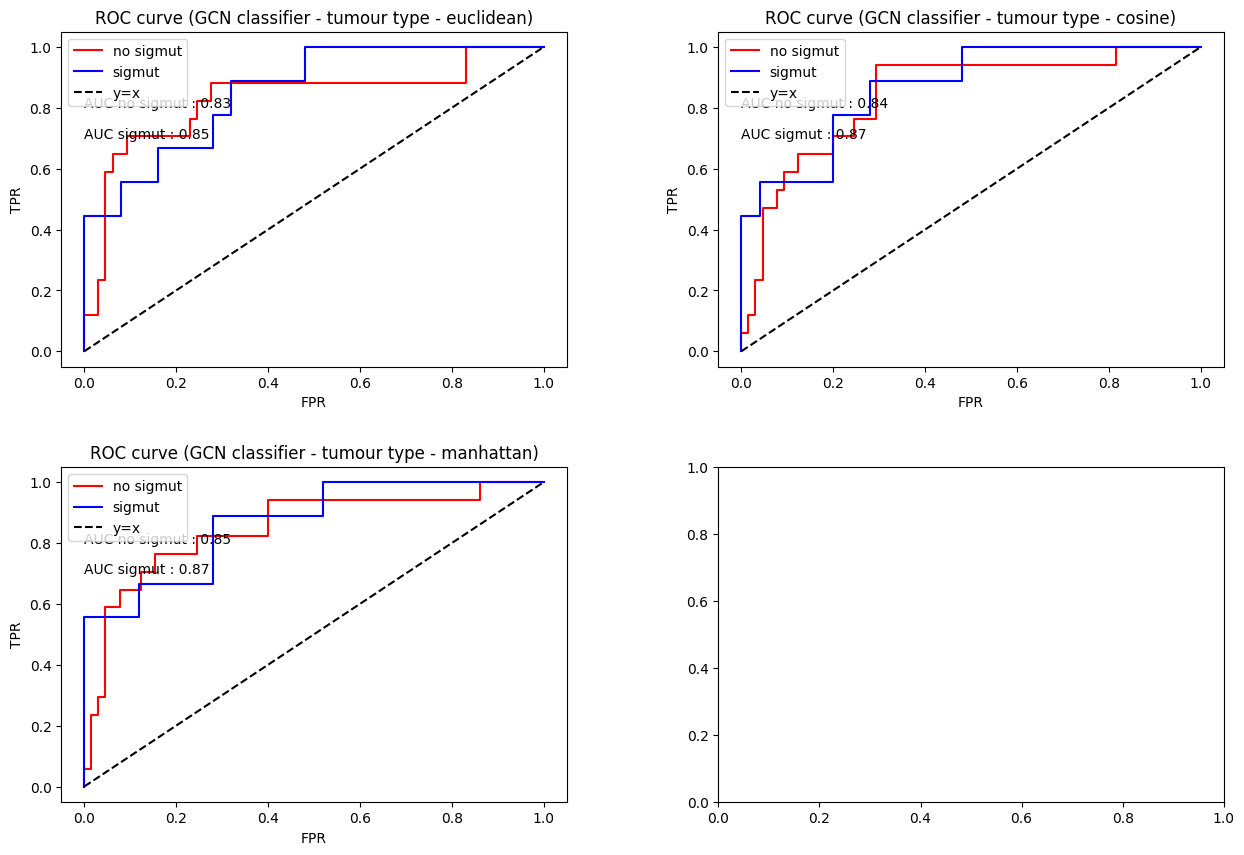

In [37]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
x = np.linspace(0,1,100)

# Euclidean distance :
ax[0,0].plot(fpr_gcn_no_sigmut_tumour_type_euclidean, tpr_gcn_no_sigmut_tumour_type_euclidean, color='red',label='no sigmut')
ax[0,0].plot(fpr_gcn_sigmut_tumour_type_euclidean, tpr_gcn_sigmut_tumour_type_euclidean, color='blue',label='sigmut')
ax[0,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,0].set_xlabel('FPR')
ax[0,0].set_ylabel('TPR')
ax[0,0].set_title('ROC curve (GCN classifier - tumour type - euclidean)')
ax[0,0].legend()
ax[0,0].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_tumour_type_euclidean}")
ax[0,0].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_tumour_type_euclidean}")

# Cosine distance :
ax[0,1].plot(fpr_gcn_no_sigmut_tumour_type_cosine, tpr_gcn_no_sigmut_tumour_type_cosine, color='red',label='no sigmut')
ax[0,1].plot(fpr_gcn_sigmut_tumour_type_cosine, tpr_gcn_sigmut_tumour_type_cosine, color='blue',label='sigmut')
ax[0,1].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,1].set_xlabel('FPR')
ax[0,1].set_ylabel('TPR')
ax[0,1].set_title('ROC curve (GCN classifier - tumour type - cosine)')
ax[0,1].legend()
ax[0,1].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_tumour_type_cosine}")
ax[0,1].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_tumour_type_cosine}")

# Manhattan distance :
ax[1,0].plot(fpr_gcn_no_sigmut_tumour_type_manhattan, tpr_gcn_no_sigmut_tumour_type_manhattan, color='red',label='no sigmut')
ax[1,0].plot(fpr_gcn_sigmut_tumour_type_manhattan, tpr_gcn_sigmut_tumour_type_manhattan, color='blue',label='sigmut')
ax[1,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[1,0].set_xlabel('FPR')
ax[1,0].set_ylabel('TPR')
ax[1,0].set_title('ROC curve (GCN classifier - tumour type - manhattan)')
ax[1,0].legend()
ax[1,0].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_tumour_type_manhattan}")
ax[1,0].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_tumour_type_manhattan}")

plt.subplots_adjust(wspace=0.3,hspace=0.3)

### GCN classifier - KMeans

In [38]:
## No sigmut - euclidean
acc_gcn_no_sigmut_kmeans_euclidean, pre_gcn_no_sigmut_kmeans_euclidean, rec_gcn_no_sigmut_kmeans_euclidean, f1_gcn_no_sigmut_kmeans_euclidean = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_kmeans_euclidean)
fpr_gcn_no_sigmut_kmeans_euclidean, tpr_gcn_no_sigmut_kmeans_euclidean, thresholds_gcn_no_sigmut_kmeans_euclidean = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_kmeans_euclidean)
auc_gcn_no_sigmut_kmeans_euclidean = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_kmeans_euclidean)

## Sigmut - euclidean
acc_gcn_sigmut_kmeans_euclidean, pre_gcn_sigmut_kmeans_euclidean, rec_gcn_sigmut_kmeans_euclidean, f1_gcn_sigmut_kmeans_euclidean = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_kmeans_euclidean)
fpr_gcn_sigmut_kmeans_euclidean, tpr_gcn_sigmut_kmeans_euclidean, thresholds_gcn_sigmut_kmeans_euclidean = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_kmeans_euclidean)
auc_gcn_sigmut_kmeans_euclidean = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_kmeans_euclidean)

## No sigmut - cosine
acc_gcn_no_sigmut_kmeans_cosine, pre_gcn_no_sigmut_kmeans_cosine, rec_gcn_no_sigmut_kmeans_cosine, f1_gcn_no_sigmut_kmeans_cosine = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_kmeans_cosine)
fpr_gcn_no_sigmut_kmeans_cosine, tpr_gcn_no_sigmut_kmeans_cosine, thresholds_gcn_no_sigmut_kmeans_cosine = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_kmeans_cosine)
auc_gcn_no_sigmut_kmeans_cosine = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_kmeans_cosine)

## Sigmut - cosine
acc_gcn_sigmut_kmeans_cosine, pre_gcn_sigmut_kmeans_cosine, rec_gcn_sigmut_kmeans_cosine, f1_gcn_sigmut_kmeans_cosine = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_kmeans_cosine)
fpr_gcn_sigmut_kmeans_cosine, tpr_gcn_sigmut_kmeans_cosine, thresholds_gcn_sigmut_kmeans_cosine = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_kmeans_cosine)
auc_gcn_sigmut_kmeans_cosine = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_kmeans_cosine)

## No sigmut - manhattan
acc_gcn_no_sigmut_kmeans_manhattan, pre_gcn_no_sigmut_kmeans_manhattan, rec_gcn_no_sigmut_kmeans_manhattan, f1_gcn_no_sigmut_kmeans_manhattan = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_kmeans_manhattan)
fpr_gcn_no_sigmut_kmeans_manhattan, tpr_gcn_no_sigmut_kmeans_manhattan, thresholds_gcn_no_sigmut_kmeans_manhattan = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_kmeans_manhattan)
auc_gcn_no_sigmut_kmeans_manhattan = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_kmeans_manhattan)

## Sigmut - manhattan
acc_gcn_sigmut_kmeans_manhattan, pre_gcn_sigmut_kmeans_manhattan, rec_gcn_sigmut_kmeans_manhattan, f1_gcn_sigmut_kmeans_manhattan = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_kmeans_manhattan)
fpr_gcn_sigmut_kmeans_manhattan, tpr_gcn_sigmut_kmeans_manhattan, thresholds_gcn_sigmut_kmeans_manhattan = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_kmeans_manhattan)
auc_gcn_sigmut_kmeans_manhattan = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_kmeans_manhattan)

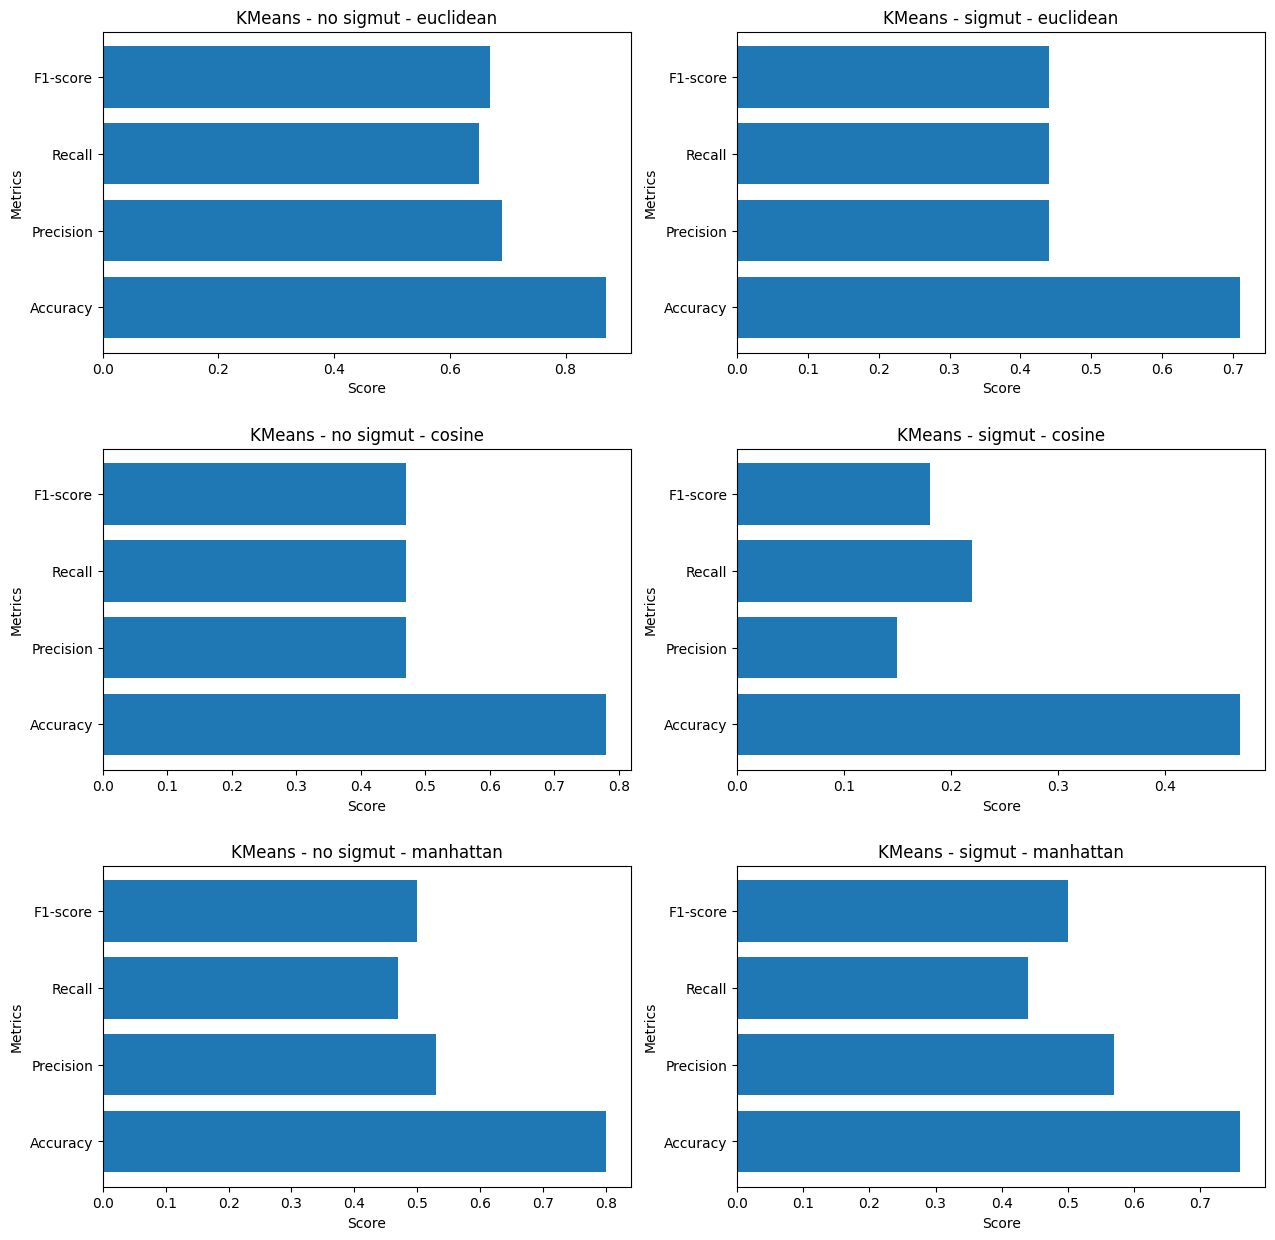

In [39]:
fig, ax = plt.subplots(3,2,figsize=(15,15))

ax[0,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_kmeans_euclidean, pre_gcn_no_sigmut_kmeans_euclidean, rec_gcn_no_sigmut_kmeans_euclidean, f1_gcn_no_sigmut_kmeans_euclidean])
ax[0,0].set_xlabel("Score")
ax[0,0].set_ylabel("Metrics")
ax[0,0].set_title("KMeans - no sigmut - euclidean")

ax[0,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_kmeans_euclidean, pre_gcn_sigmut_kmeans_euclidean, rec_gcn_sigmut_kmeans_euclidean, f1_gcn_sigmut_kmeans_euclidean])
ax[0,1].set_xlabel("Score")
ax[0,1].set_ylabel("Metrics")
ax[0,1].set_title("KMeans - sigmut - euclidean")

ax[1,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_kmeans_cosine, pre_gcn_no_sigmut_kmeans_cosine, rec_gcn_no_sigmut_kmeans_cosine, f1_gcn_no_sigmut_kmeans_cosine])
ax[1,0].set_xlabel("Score")
ax[1,0].set_ylabel("Metrics")
ax[1,0].set_title("KMeans - no sigmut - cosine")

ax[1,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_kmeans_cosine, pre_gcn_sigmut_kmeans_cosine, rec_gcn_sigmut_kmeans_cosine, f1_gcn_sigmut_kmeans_cosine])
ax[1,1].set_xlabel("Score")
ax[1,1].set_ylabel("Metrics")
ax[1,1].set_title("KMeans - sigmut - cosine")

ax[2,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_kmeans_manhattan, pre_gcn_no_sigmut_kmeans_manhattan, rec_gcn_no_sigmut_kmeans_manhattan, f1_gcn_no_sigmut_kmeans_manhattan])
ax[2,0].set_xlabel("Score")
ax[2,0].set_ylabel("Metrics")
ax[2,0].set_title("KMeans - no sigmut - manhattan")

ax[2,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_kmeans_manhattan, pre_gcn_sigmut_kmeans_manhattan, rec_gcn_sigmut_kmeans_manhattan, f1_gcn_sigmut_kmeans_manhattan])
ax[2,1].set_xlabel("Score")
ax[2,1].set_ylabel("Metrics")
ax[2,1].set_title("KMeans - sigmut - manhattan")

plt.subplots_adjust(hspace=0.3)

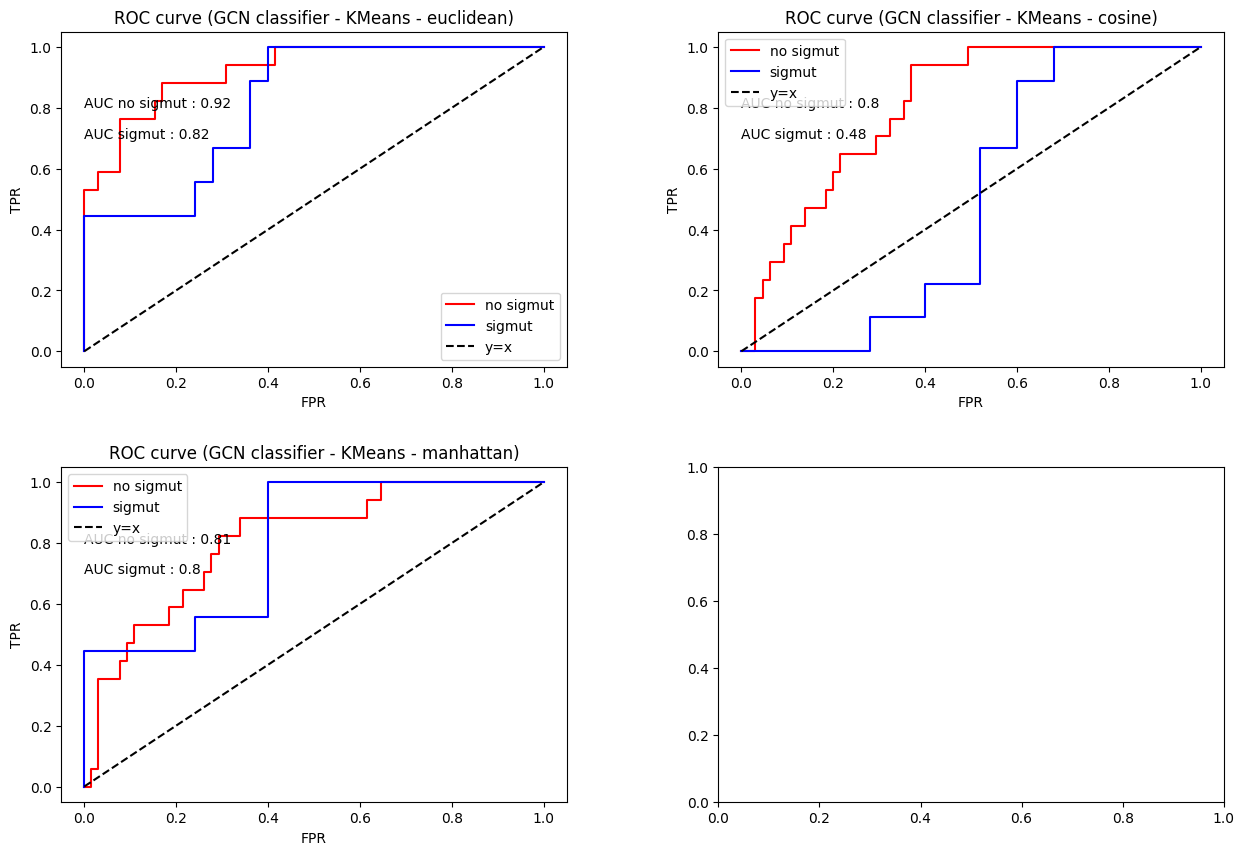

In [40]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
x = np.linspace(0,1,100)

# Euclidean distance :
ax[0,0].plot(fpr_gcn_no_sigmut_kmeans_euclidean, tpr_gcn_no_sigmut_kmeans_euclidean, color='red',label='no sigmut')
ax[0,0].plot(fpr_gcn_sigmut_kmeans_euclidean, tpr_gcn_sigmut_kmeans_euclidean, color='blue',label='sigmut')
ax[0,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,0].set_xlabel('FPR')
ax[0,0].set_ylabel('TPR')
ax[0,0].set_title('ROC curve (GCN classifier - KMeans - euclidean)')
ax[0,0].legend()
ax[0,0].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_kmeans_euclidean}")
ax[0,0].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_kmeans_euclidean}")

# Cosine distance :
ax[0,1].plot(fpr_gcn_no_sigmut_kmeans_cosine, tpr_gcn_no_sigmut_kmeans_cosine, color='red',label='no sigmut')
ax[0,1].plot(fpr_gcn_sigmut_kmeans_cosine, tpr_gcn_sigmut_kmeans_cosine, color='blue',label='sigmut')
ax[0,1].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,1].set_xlabel('FPR')
ax[0,1].set_ylabel('TPR')
ax[0,1].set_title('ROC curve (GCN classifier - KMeans - cosine)')
ax[0,1].legend()
ax[0,1].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_kmeans_cosine}")
ax[0,1].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_kmeans_cosine}")

# Manhattan distance :
ax[1,0].plot(fpr_gcn_no_sigmut_kmeans_manhattan, tpr_gcn_no_sigmut_kmeans_manhattan, color='red',label='no sigmut')
ax[1,0].plot(fpr_gcn_sigmut_kmeans_manhattan, tpr_gcn_sigmut_kmeans_manhattan, color='blue',label='sigmut')
ax[1,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[1,0].set_xlabel('FPR')
ax[1,0].set_ylabel('TPR')
ax[1,0].set_title('ROC curve (GCN classifier - KMeans - manhattan)')
ax[1,0].legend()
ax[1,0].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_kmeans_manhattan}")
ax[1,0].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_kmeans_manhattan}")

plt.subplots_adjust(wspace=0.3,hspace=0.3)

### GCN classifier - Spectral clustering

In [41]:
## No sigmut - euclidean distance
acc_gcn_no_sigmut_spectral_euclidean, pre_gcn_no_sigmut_spectral_euclidean, rec_gcn_no_sigmut_spectral_euclidean, f1_gcn_no_sigmut_spectral_euclidean = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_spectral_euclidean)
fpr_gcn_no_sigmut_spectral_euclidean, tpr_gcn_no_sigmut_spectral_euclidean, thresholds_gcn_no_sigmut_spectral_euclidean = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_spectral_euclidean)
auc_gcn_no_sigmut_spectral_euclidean = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_spectral_euclidean)

## Sigmut - euclidean distance
acc_gcn_sigmut_spectral_euclidean, pre_gcn_sigmut_spectral_euclidean, rec_gcn_sigmut_spectral_euclidean, f1_gcn_sigmut_spectral_euclidean = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_spectral_euclidean)
fpr_gcn_sigmut_spectral_euclidean, tpr_gcn_sigmut_spectral_euclidean, thresholds_gcn_sigmut_spectral_euclidean = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_spectral_euclidean)
auc_gcn_sigmut_spectral_euclidean = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_spectral_euclidean)

## No sigmut - cosine distance
acc_gcn_no_sigmut_spectral_cosine, pre_gcn_no_sigmut_spectral_cosine, rec_gcn_no_sigmut_spectral_cosine, f1_gcn_no_sigmut_spectral_cosine = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_spectral_cosine)
fpr_gcn_no_sigmut_spectral_cosine, tpr_gcn_no_sigmut_spectral_cosine, thresholds_gcn_no_sigmut_spectral_cosine = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_spectral_cosine)
auc_gcn_no_sigmut_spectral_cosine = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_spectral_cosine)

## Sigmut - cosine distance
acc_gcn_sigmut_spectral_cosine, pre_gcn_sigmut_spectral_cosine, rec_gcn_sigmut_spectral_cosine, f1_gcn_sigmut_spectral_cosine = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_spectral_cosine)
fpr_gcn_sigmut_spectral_cosine, tpr_gcn_sigmut_spectral_cosine, thresholds_gcn_sigmut_spectral_cosine = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_spectral_cosine)
auc_gcn_sigmut_spectral_cosine = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_spectral_cosine)

## No sigmut - manhattan distance
acc_gcn_no_sigmut_spectral_manhattan, pre_gcn_no_sigmut_spectral_manhattan, rec_gcn_no_sigmut_spectral_manhattan, f1_gcn_no_sigmut_spectral_manhattan = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_spectral_manhattan)
fpr_gcn_no_sigmut_spectral_manhattan, tpr_gcn_no_sigmut_spectral_manhattan, thresholds_gcn_no_sigmut_spectral_manhattan = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_spectral_manhattan)
auc_gcn_no_sigmut_spectral_manhattan = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_spectral_manhattan)

## Sigmut - manhattan distance
acc_gcn_sigmut_spectral_manhattan, pre_gcn_sigmut_spectral_manhattan, rec_gcn_sigmut_spectral_manhattan, f1_gcn_sigmut_spectral_manhattan = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_spectral_manhattan)
fpr_gcn_sigmut_spectral_manhattan, tpr_gcn_sigmut_spectral_manhattan, thresholds_gcn_sigmut_spectral_manhattan = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_spectral_manhattan)
auc_gcn_sigmut_spectral_manhattan = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_spectral_manhattan)

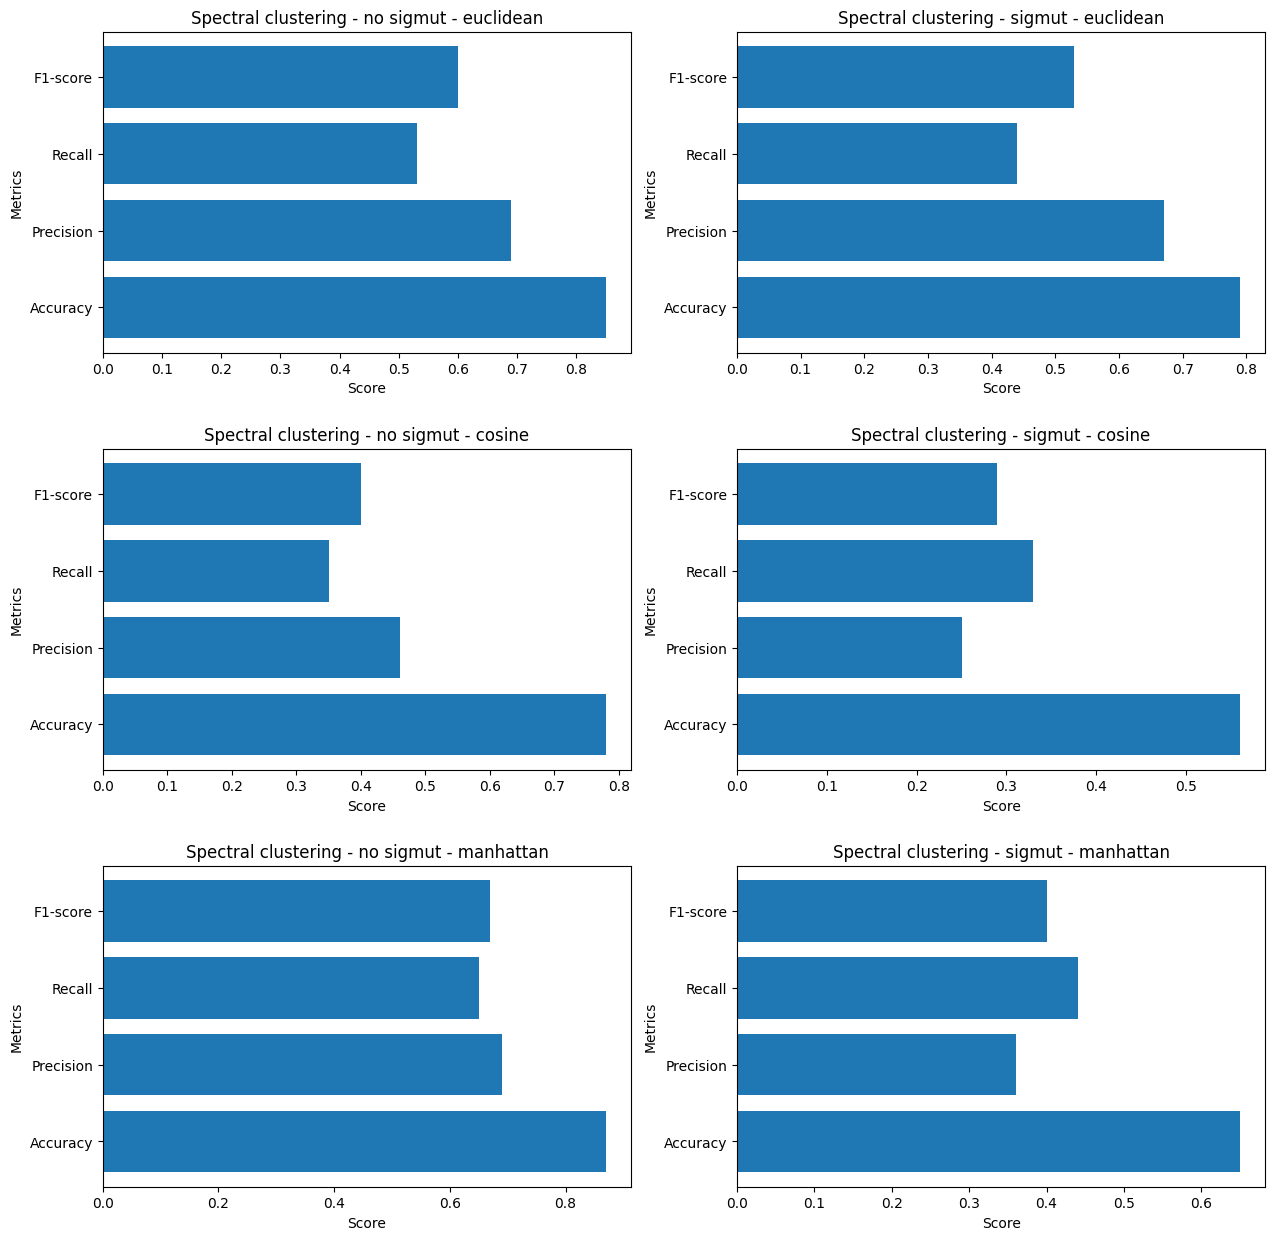

In [42]:
fig, ax = plt.subplots(3,2,figsize=(15,15))

ax[0,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_spectral_euclidean, pre_gcn_no_sigmut_spectral_euclidean, rec_gcn_no_sigmut_spectral_euclidean, f1_gcn_no_sigmut_spectral_euclidean])
ax[0,0].set_xlabel("Score")
ax[0,0].set_ylabel("Metrics")
ax[0,0].set_title("Spectral clustering - no sigmut - euclidean")

ax[0,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_spectral_euclidean, pre_gcn_sigmut_spectral_euclidean, rec_gcn_sigmut_spectral_euclidean, f1_gcn_sigmut_spectral_euclidean])
ax[0,1].set_xlabel("Score")
ax[0,1].set_ylabel("Metrics")
ax[0,1].set_title("Spectral clustering - sigmut - euclidean")

ax[1,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_spectral_cosine, pre_gcn_no_sigmut_spectral_cosine, rec_gcn_no_sigmut_spectral_cosine, f1_gcn_no_sigmut_spectral_cosine])
ax[1,0].set_xlabel("Score")
ax[1,0].set_ylabel("Metrics")
ax[1,0].set_title("Spectral clustering - no sigmut - cosine")

ax[1,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_spectral_cosine, pre_gcn_sigmut_spectral_cosine, rec_gcn_sigmut_spectral_cosine, f1_gcn_sigmut_spectral_cosine])
ax[1,1].set_xlabel("Score")
ax[1,1].set_ylabel("Metrics")
ax[1,1].set_title("Spectral clustering - sigmut - cosine")

ax[2,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_spectral_manhattan, pre_gcn_no_sigmut_spectral_manhattan, rec_gcn_no_sigmut_spectral_manhattan, f1_gcn_no_sigmut_spectral_manhattan])
ax[2,0].set_xlabel("Score")
ax[2,0].set_ylabel("Metrics")
ax[2,0].set_title("Spectral clustering - no sigmut - manhattan")

ax[2,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_spectral_manhattan, pre_gcn_sigmut_spectral_manhattan, rec_gcn_sigmut_spectral_manhattan, f1_gcn_sigmut_spectral_manhattan])
ax[2,1].set_xlabel("Score")
ax[2,1].set_ylabel("Metrics")
ax[2,1].set_title("Spectral clustering - sigmut - manhattan")

plt.subplots_adjust(hspace=0.3)

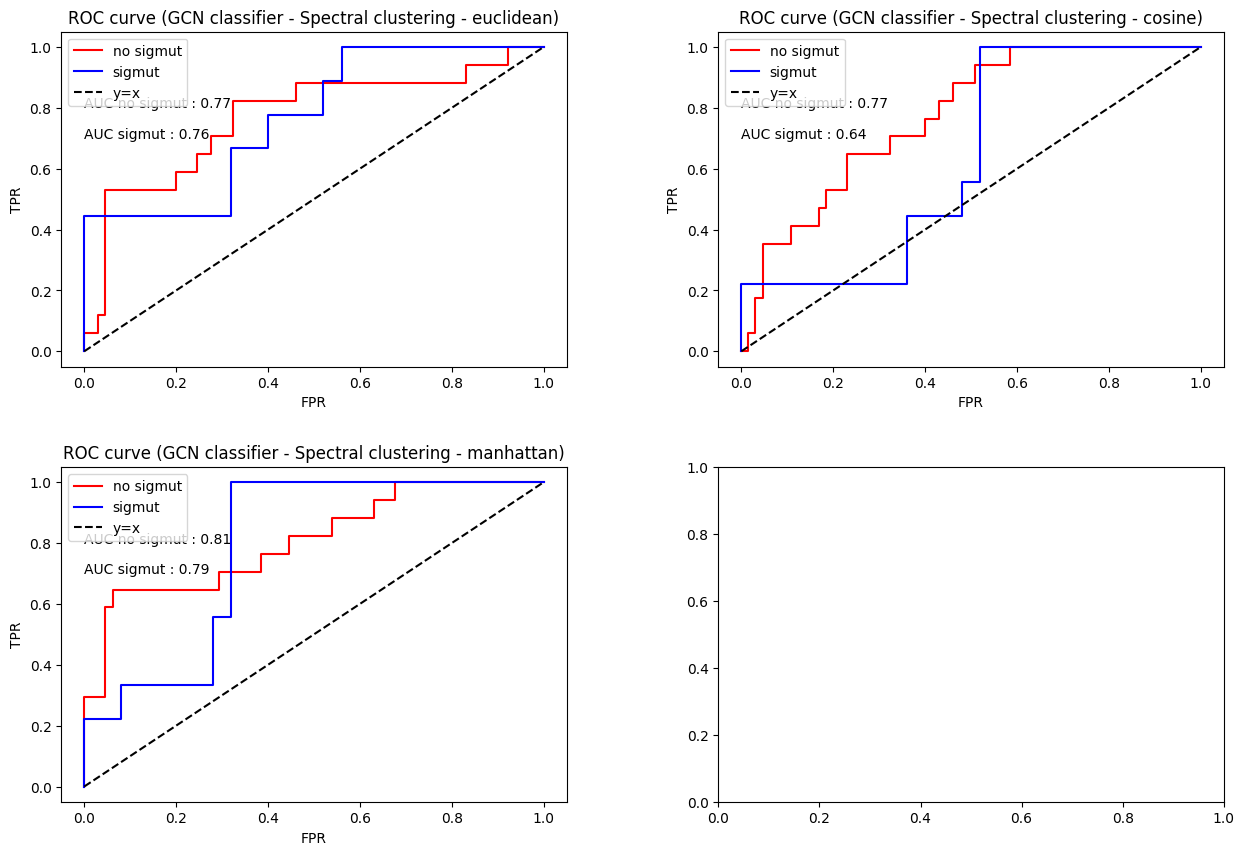

In [43]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
x = np.linspace(0,1,100)

# Euclidean distance :
ax[0,0].plot(fpr_gcn_no_sigmut_spectral_euclidean, tpr_gcn_no_sigmut_spectral_euclidean, color='red',label='no sigmut')
ax[0,0].plot(fpr_gcn_sigmut_spectral_euclidean, tpr_gcn_sigmut_spectral_euclidean, color='blue',label='sigmut')
ax[0,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,0].set_xlabel('FPR')
ax[0,0].set_ylabel('TPR')
ax[0,0].set_title('ROC curve (GCN classifier - Spectral clustering - euclidean)')
ax[0,0].legend()
ax[0,0].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_spectral_euclidean}")
ax[0,0].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_spectral_euclidean}")

# Cosine distance :
ax[0,1].plot(fpr_gcn_no_sigmut_spectral_cosine, tpr_gcn_no_sigmut_spectral_cosine, color='red',label='no sigmut')
ax[0,1].plot(fpr_gcn_sigmut_spectral_cosine, tpr_gcn_sigmut_spectral_cosine, color='blue',label='sigmut')
ax[0,1].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,1].set_xlabel('FPR')
ax[0,1].set_ylabel('TPR')
ax[0,1].set_title('ROC curve (GCN classifier - Spectral clustering - cosine)')
ax[0,1].legend()
ax[0,1].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_spectral_cosine}")
ax[0,1].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_spectral_cosine}")

# Manhattan distance :
ax[1,0].plot(fpr_gcn_no_sigmut_spectral_manhattan, tpr_gcn_no_sigmut_spectral_manhattan, color='red',label='no sigmut')
ax[1,0].plot(fpr_gcn_sigmut_spectral_manhattan, tpr_gcn_sigmut_spectral_manhattan, color='blue',label='sigmut')
ax[1,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[1,0].set_xlabel('FPR')
ax[1,0].set_ylabel('TPR')
ax[1,0].set_title('ROC curve (GCN classifier - Spectral clustering - manhattan)')
ax[1,0].legend()
ax[1,0].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_spectral_manhattan}")
ax[1,0].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_spectral_manhattan}")

plt.subplots_adjust(wspace=0.3,hspace=0.3)

### GCN classifier - Hierarchical clustering

In [44]:
## No sigmut - euclidean distance
acc_gcn_no_sigmut_hierarchical_euclidean, pre_gcn_no_sigmut_hierarchical_euclidean, rec_gcn_no_sigmut_hierarchical_euclidean, f1_gcn_no_sigmut_hierarchical_euclidean = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_hierarchical_euclidean)
fpr_gcn_no_sigmut_hierarchical_euclidean, tpr_gcn_no_sigmut_hierarchical_euclidean, thresholds_gcn_no_sigmut_hierarchical_euclidean = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_hierarchical_euclidean)
auc_gcn_no_sigmut_hierarchical_euclidean = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_hierarchical_euclidean)

## Sigmut - euclidean distance
acc_gcn_sigmut_hierarchical_euclidean, pre_gcn_sigmut_hierarchical_euclidean, rec_gcn_sigmut_hierarchical_euclidean, f1_gcn_sigmut_hierarhical_euclidean = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_hierarchical_euclidean)
fpr_gcn_sigmut_hierarchical_euclidean, tpr_gcn_sigmut_hierarchical_euclidean, thresholds_gcn_sigmut_hierarchical_euclidean = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_hierarchical_euclidean)
auc_gcn_sigmut_hierarchical_euclidean = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_hierarchical_euclidean)

## No sigmut - cosine distance
acc_gcn_no_sigmut_hierarchical_cosine, pre_gcn_no_sigmut_hierarchical_cosine, rec_gcn_no_sigmut_hierarchical_cosine, f1_gcn_no_sigmut_hierarchical_cosine = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_hierarchical_cosine)
fpr_gcn_no_sigmut_hierarchical_cosine, tpr_gcn_no_sigmut_hierarchical_cosine, thresholds_gcn_no_sigmut_hierarchical_cosine = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_hierarchical_cosine)
auc_gcn_no_sigmut_hierarchical_cosine = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_hierarchical_cosine)

## Sigmut - cosine distance
acc_gcn_sigmut_hierarchical_cosine, pre_gcn_sigmut_hierarchical_cosine, rec_gcn_sigmut_hierarchical_cosine, f1_gcn_sigmut_hierarhical_cosine = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_hierarchical_cosine)
fpr_gcn_sigmut_hierarchical_cosine, tpr_gcn_sigmut_hierarchical_cosine, thresholds_gcn_sigmut_hierarchical_cosine = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_hierarchical_cosine)
auc_gcn_sigmut_hierarchical_cosine = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_hierarchical_cosine)

## No sigmut - manhattan distance
acc_gcn_no_sigmut_hierarchical_manhattan, pre_gcn_no_sigmut_hierarchical_manhattan, rec_gcn_no_sigmut_hierarchical_manhattan, f1_gcn_no_sigmut_hierarchical_manhattan = ClassificationMetrics.eval_metrics_from_conf_matrix(y_no_sigmut, test_classes_gcn_no_sigmut_hierarchical_manhattan)
fpr_gcn_no_sigmut_hierarchical_manhattan, tpr_gcn_no_sigmut_hierarchical_manhattan, thresholds_gcn_no_sigmut_hierarchical_manhattan = ClassificationMetrics.compute_roc_curve(y_no_sigmut, test_scores_gcn_no_sigmut_hierarchical_manhattan)
auc_gcn_no_sigmut_hierarchical_manhattan = ClassificationMetrics.compute_auc(y_no_sigmut, test_scores_gcn_no_sigmut_hierarchical_manhattan)

## Sigmut - manhattan distance
acc_gcn_sigmut_hierarchical_manhattan, pre_gcn_sigmut_hierarchical_manhattan, rec_gcn_sigmut_hierarchical_manhattan, f1_gcn_sigmut_hierarhical_manhattan = ClassificationMetrics.eval_metrics_from_conf_matrix(y_sigmut, test_classes_gcn_sigmut_hierarchical_manhattan)
fpr_gcn_sigmut_hierarchical_manhattan, tpr_gcn_sigmut_hierarchical_manhattan, thresholds_gcn_sigmut_hierarchical_manhattan = ClassificationMetrics.compute_roc_curve(y_sigmut, test_scores_gcn_sigmut_hierarchical_manhattan)
auc_gcn_sigmut_hierarchical_manhattan = ClassificationMetrics.compute_auc(y_sigmut, test_scores_gcn_sigmut_hierarchical_manhattan)

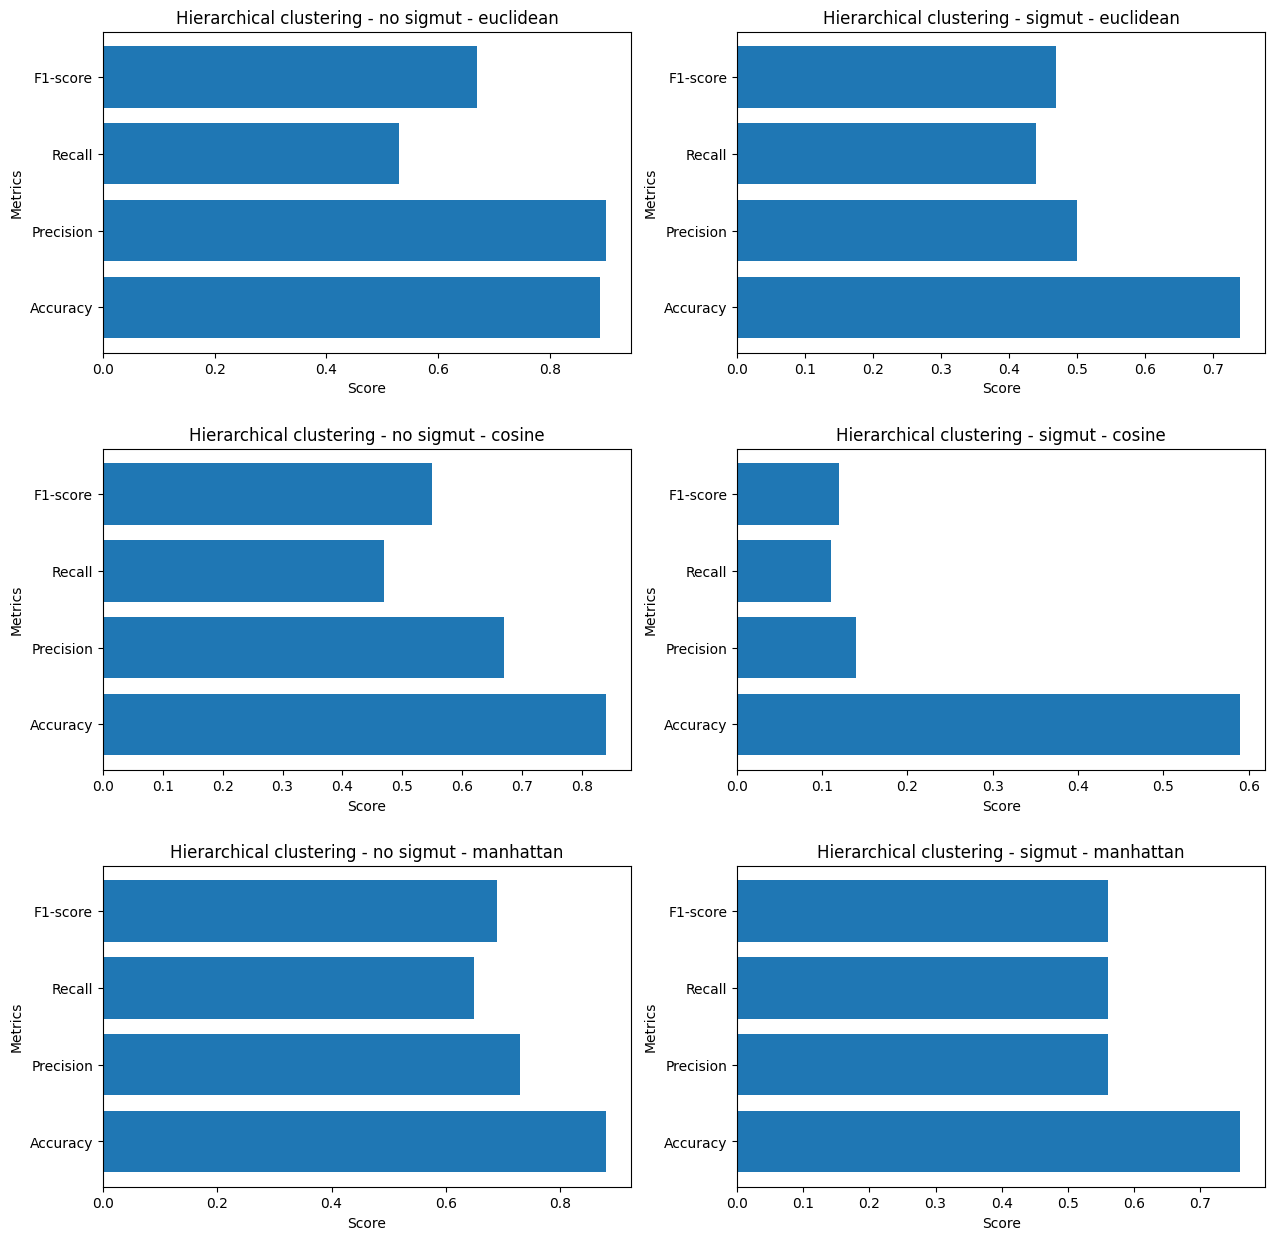

In [45]:
fig, ax = plt.subplots(3,2,figsize=(15,15))

ax[0,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_hierarchical_euclidean, pre_gcn_no_sigmut_hierarchical_euclidean, rec_gcn_no_sigmut_hierarchical_euclidean, f1_gcn_no_sigmut_hierarchical_euclidean])
ax[0,0].set_xlabel("Score")
ax[0,0].set_ylabel("Metrics")
ax[0,0].set_title("Hierarchical clustering - no sigmut - euclidean")

ax[0,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_hierarchical_euclidean, pre_gcn_sigmut_hierarchical_euclidean, rec_gcn_sigmut_hierarchical_euclidean, f1_gcn_sigmut_hierarhical_euclidean])
ax[0,1].set_xlabel("Score")
ax[0,1].set_ylabel("Metrics")
ax[0,1].set_title("Hierarchical clustering - sigmut - euclidean")

ax[1,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_hierarchical_cosine, pre_gcn_no_sigmut_hierarchical_cosine, rec_gcn_no_sigmut_hierarchical_cosine, f1_gcn_no_sigmut_hierarchical_cosine])
ax[1,0].set_xlabel("Score")
ax[1,0].set_ylabel("Metrics")
ax[1,0].set_title("Hierarchical clustering - no sigmut - cosine")

ax[1,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_hierarchical_cosine, pre_gcn_sigmut_hierarchical_cosine, rec_gcn_sigmut_hierarchical_cosine, f1_gcn_sigmut_hierarhical_cosine])
ax[1,1].set_xlabel("Score")
ax[1,1].set_ylabel("Metrics")
ax[1,1].set_title("Hierarchical clustering - sigmut - cosine")

ax[2,0].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_no_sigmut_hierarchical_manhattan, pre_gcn_no_sigmut_hierarchical_manhattan, rec_gcn_no_sigmut_hierarchical_manhattan, f1_gcn_no_sigmut_hierarchical_manhattan])
ax[2,0].set_xlabel("Score")
ax[2,0].set_ylabel("Metrics")
ax[2,0].set_title("Hierarchical clustering - no sigmut - manhattan")

ax[2,1].barh(["Accuracy","Precision","Recall","F1-score"],[acc_gcn_sigmut_hierarchical_manhattan, pre_gcn_sigmut_hierarchical_manhattan, rec_gcn_sigmut_hierarchical_manhattan, f1_gcn_sigmut_hierarhical_manhattan])
ax[2,1].set_xlabel("Score")
ax[2,1].set_ylabel("Metrics")
ax[2,1].set_title("Hierarchical clustering - sigmut - manhattan")

plt.subplots_adjust(hspace=0.3)

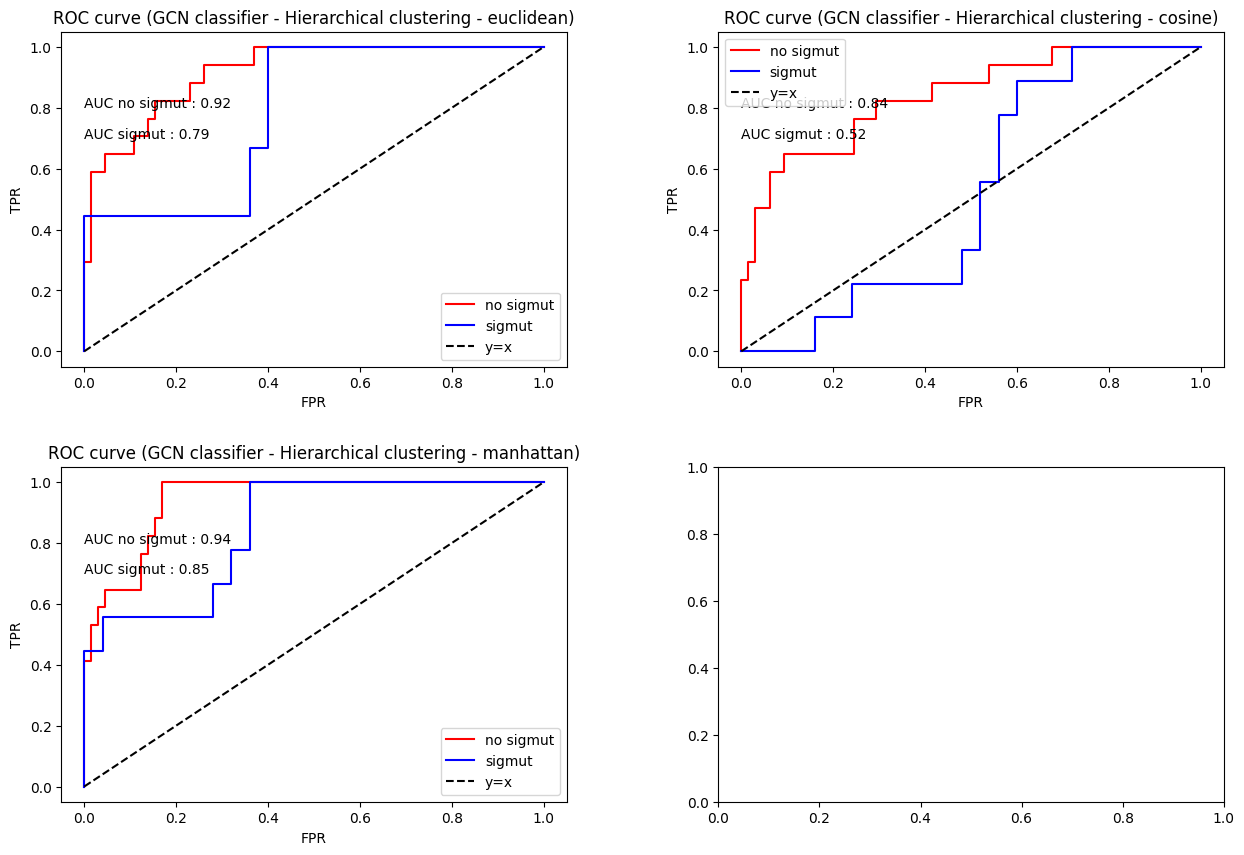

In [46]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
x = np.linspace(0,1,100)

# Euclidean distance :
ax[0,0].plot(fpr_gcn_no_sigmut_hierarchical_euclidean, tpr_gcn_no_sigmut_hierarchical_euclidean, color='red',label='no sigmut')
ax[0,0].plot(fpr_gcn_sigmut_hierarchical_euclidean, tpr_gcn_sigmut_hierarchical_euclidean, color='blue',label='sigmut')
ax[0,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,0].set_xlabel('FPR')
ax[0,0].set_ylabel('TPR')
ax[0,0].set_title('ROC curve (GCN classifier - Hierarchical clustering - euclidean)')
ax[0,0].legend()
ax[0,0].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_hierarchical_euclidean}")
ax[0,0].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_hierarchical_euclidean}")

# Cosine distance :
ax[0,1].plot(fpr_gcn_no_sigmut_hierarchical_cosine, tpr_gcn_no_sigmut_hierarchical_cosine, color='red',label='no sigmut')
ax[0,1].plot(fpr_gcn_sigmut_hierarchical_cosine, tpr_gcn_sigmut_hierarchical_cosine, color='blue',label='sigmut')
ax[0,1].plot(x,x,linestyle='--',color='black',label='y=x')
ax[0,1].set_xlabel('FPR')
ax[0,1].set_ylabel('TPR')
ax[0,1].set_title('ROC curve (GCN classifier - Hierarchical clustering - cosine)')
ax[0,1].legend()
ax[0,1].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_hierarchical_cosine}")
ax[0,1].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_hierarchical_cosine}")

# Manhattan distance :
ax[1,0].plot(fpr_gcn_no_sigmut_hierarchical_manhattan, tpr_gcn_no_sigmut_hierarchical_manhattan, color='red',label='no sigmut')
ax[1,0].plot(fpr_gcn_sigmut_hierarchical_manhattan, tpr_gcn_sigmut_hierarchical_manhattan, color='blue',label='sigmut')
ax[1,0].plot(x,x,linestyle='--',color='black',label='y=x')
ax[1,0].set_xlabel('FPR')
ax[1,0].set_ylabel('TPR')
ax[1,0].set_title('ROC curve (GCN classifier - Hierarchical clustering - manhattan)')
ax[1,0].legend()
ax[1,0].text(0,0.8,f"AUC no sigmut : {auc_gcn_no_sigmut_hierarchical_manhattan}")
ax[1,0].text(0,0.7,f"AUC sigmut : {auc_gcn_sigmut_hierarchical_manhattan}")

plt.subplots_adjust(wspace=0.3,hspace=0.3)